# 랭체인(LangChain) Compression 예제 - PatentGPT
## 작성자 : AISchool ( http://aischool.ai/%ec%98%a8%eb%9d%bc%ec%9d%b8-%ea%b0%95%ec%9d%98-%ec%b9%b4%ed%85%8c%ea%b3%a0%eb%a6%ac/ )
## 특허 데이터 다운받기 : https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=data&dataSetSn=547

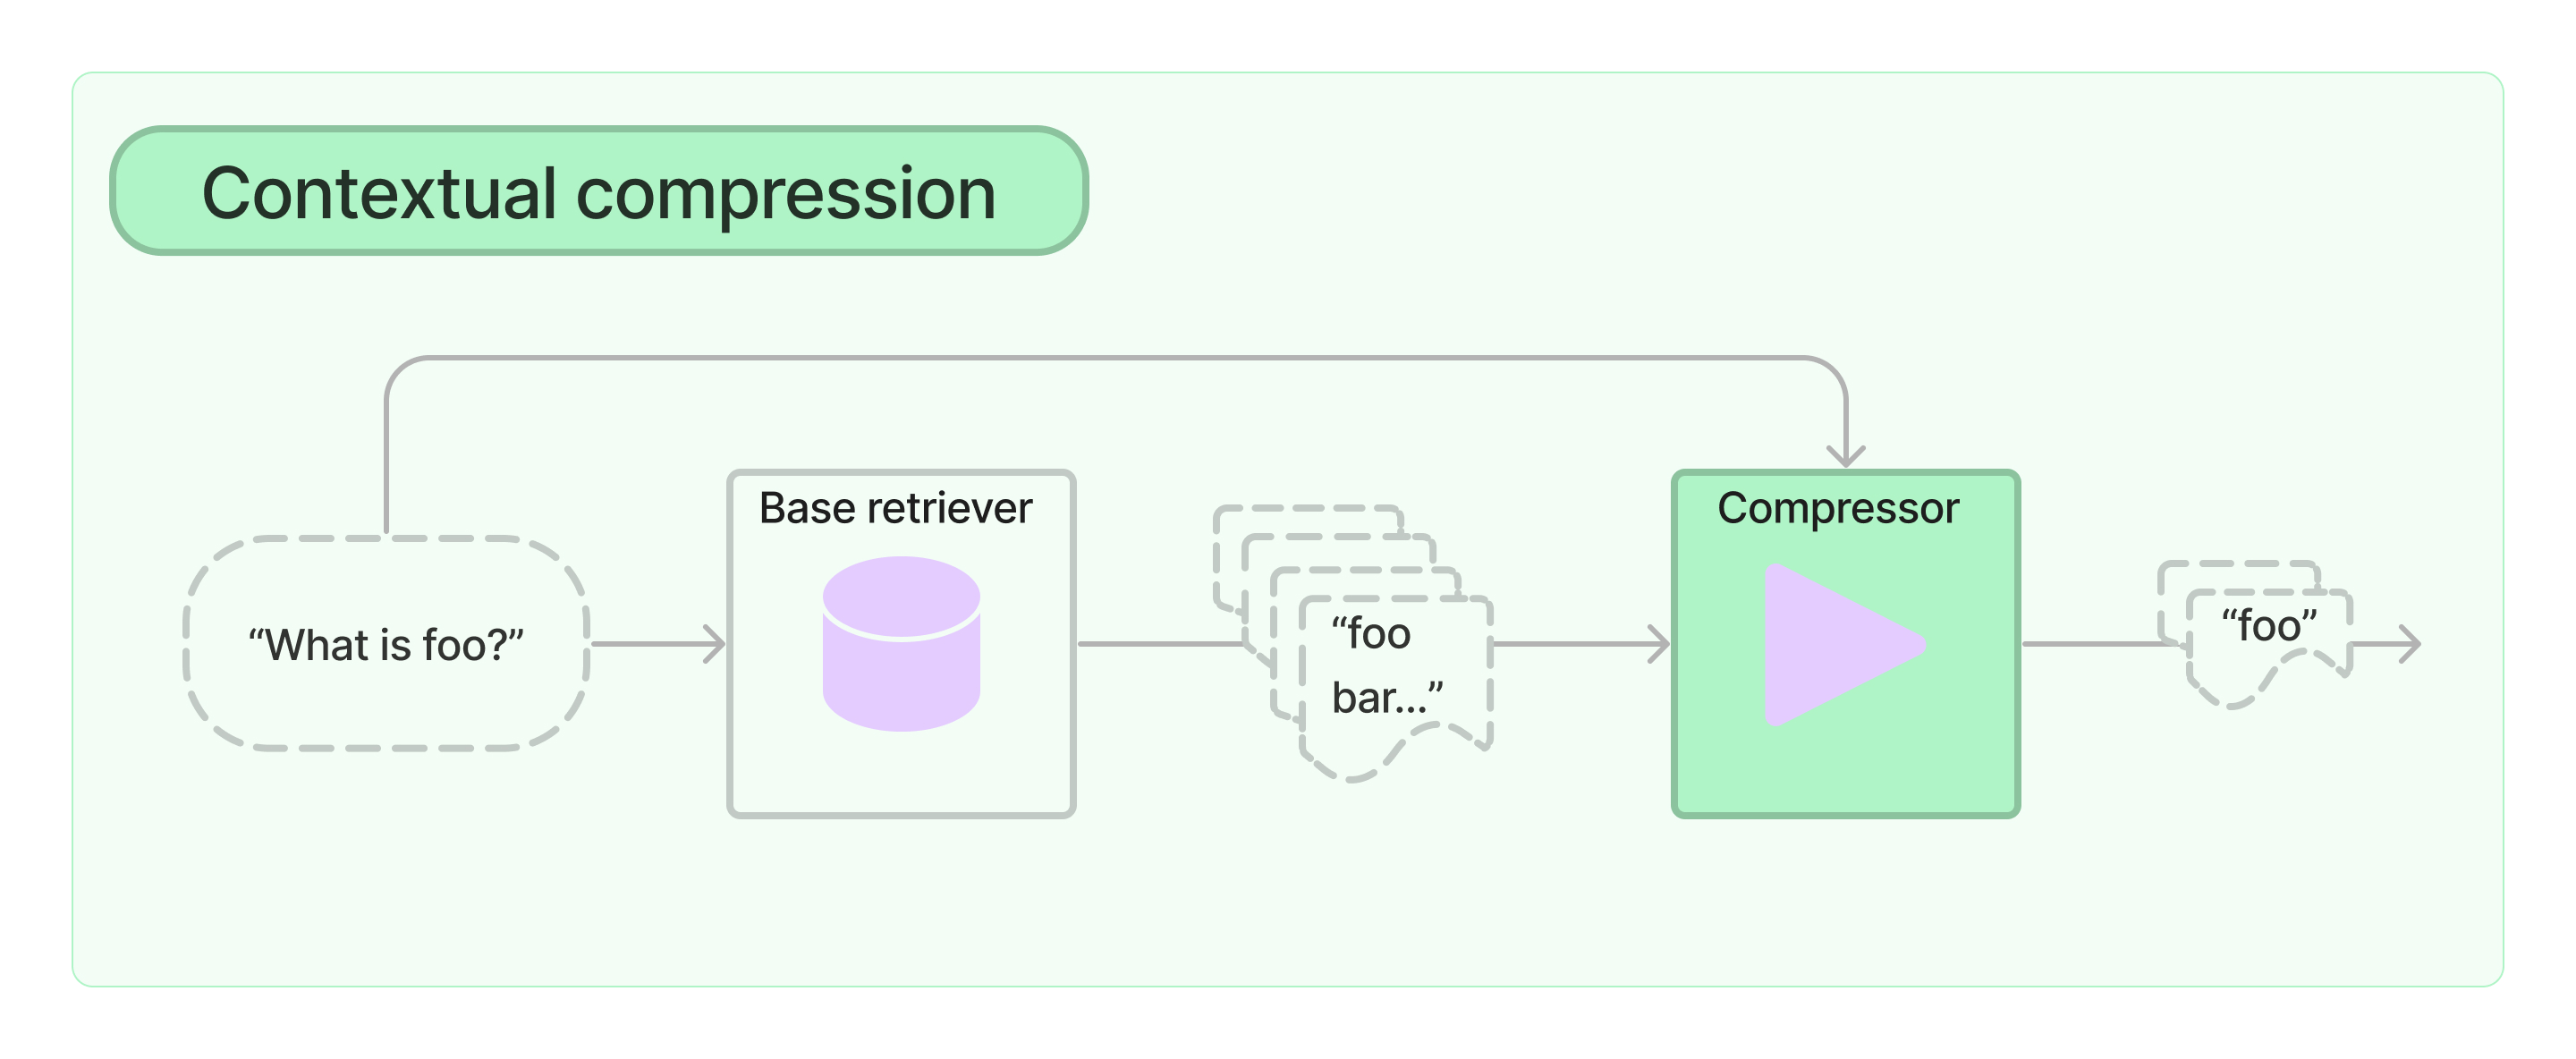

# 특허 데이터 다운로드 & 업로드하기

In [ ]:
# /032.특허 분야 자동분류 데이터/01.데이터/2.Validation/원천데이터/VS1/J_정보통신업_58_63/62_컴퓨터프로그래밍_시스템통합및관리업/620_컴퓨터프로그래밍_시스템통합및관리업/
# 62010_컴퓨터프로그래밍서비스업.json

# LangChain 라이브러리 설치

In [ ]:
!pip install langchain openai chromadb tiktoken pypdf unstructured sentence-transformers jq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.4/502.4 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.6/277.6 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.0/656.0 kB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 75.1 MB/s 

# 컴퓨터프로그래밍서비스업 특허 데이터 읽어오기

In [ ]:
from langchain.document_loaders import JSONLoader

# 62010_컴퓨터프로그래밍서비스업.json
loader = JSONLoader(
    file_path='./62010_컴퓨터프로그래밍서비스업.json',
    jq_schema='.dataset[]',
    text_content=False)
docs = loader.load()
docs

[Document(page_content='{"application_year": "2017", "invention_title": "\\uce90\\uc26c\\ubc31 \\uc11c\\ube44\\uc2a4 \\ubc29\\ubc95 \\ubc0f \\uc774\\ub97c \\uc2e4\\ud589\\ud558\\ub294 \\uc0ac\\uc5c5\\uc790 \\uc11c\\ubc84", "ipc_section": "G", "register_date": "20170905", "abstract": "\\ubcf8 \\ubc1c\\uba85\\uc758 \\uc77c \\uc2e4\\uc2dc\\uc608\\uc5d0 \\ub530\\ub978 \\uc81c\\ud488 \\uad6c\\ub9e4 \\uad00\\ub9ac \\uc11c\\ubc84\\uc5d0\\uc11c \\uc2e4\\ud589\\ub418\\ub294 \\uce90\\uc26c\\ubc31 \\uc11c\\ube44\\uc2a4 \\ubc29\\ubc95\\uc740 \\ud68c\\uc6d0\\uc5d0 \\uc758\\ud574 \\uc81c\\ud488\\uc758 \\uad6c\\ub9e4\\uac00 \\uc694\\uccad\\ub418\\uba74 \\uad6c\\ub9e4 \\uae08\\uc561 \\ubc0f \\uad6c\\ub9e4 \\uc218\\ub7c9\\uc5d0 \\ub530\\ub77c \\ud68c\\uc6d0\\uc5d0 \\uc758\\ud55c \\uad6c\\ub9e4\\ub97c \\uc2b9\\uc778\\ud558\\ub294 \\ub2e8\\uacc4, \\uc0c1\\uae30 \\uc2b9\\uc778 \\uacb0\\uacfc\\uc5d0 \\ub530\\ub77c \\uc0c1\\uae30 \\ud68c\\uc6d0\\uc5d0 \\uc758\\ud55c \\uad6c\\ub9e4\\uac00 \\uc644\\ub8cc\\ub4

# 한글 인코딩 처리

In [ ]:
from langchain.docstore.document import Document

refined_docs = []

# 유니코드 이스케이프 시퀀스를 정상적인 문자열로 변환
for idx, doc in enumerate(docs):
    broken_korean = doc.page_content
    fixed_korean = broken_korean.encode('latin1').decode('unicode-escape')

    refined_doc = Document(page_content=fixed_korean)
    refined_docs.append(refined_doc)


    print(idx, fixed_korean)

0 {"application_year": "2017", "invention_title": "캐쉬백 서비스 방법 및 이를 실행하는 사업자 서버", "ipc_section": "G", "register_date": "20170905", "abstract": "본 발명의 일 실시예에 따른 제품 구매 관리 서버에서 실행되는 캐쉬백 서비스 방법은 회원에 의해 제품의 구매가 요청되면 구매 금액 및 구매 수량에 따라 회원에 의한 구매를 승인하는 단계, 상기 승인 결과에 따라 상기 회원에 의한 구매가 완료되면 상기 회원의 직접 추천 회원 및 간접 추천 회원을 검색하는 단계 및 상기 직접 추천 회원 및 상기 간접 추천 회원의 전체 또는 일부에 상기 구매 금액의 일부를 캐쉬백하는 단계를 포함한다. 따라서, 본 발명은 이미 회원으로 가입한 사용자가 다른 사용자에게 상품의 차별화된 품질과 가치를 소개 및 전달하여 연쇄추천방식의 네트워크 파급 효과를 기대할 수 있으며, 또한, 본 발명은 생산자가 직접 사업자 서버를 통해 생산품을 판매할 수 있도록 하는 캐쉬백 서비스 방법 및 이를 실행하는 사업자 서버를 제공함으로서 우수한 기술로 생산된 제품을 엄선하여 생산자로부터 직접 구입 또는 생산자가 직접 회원에게 배송하는 절차를 통하여 저렴한 가격은 물론, 여러 형태의 도·소매 유통경로를 거치는 과정에서 발생되는 과다한 유통마진을 제거하고 회원들 스스로 홍보하고 추천하고 회원들이 원하는 품질 좋은 제품을 저렴한 가격에 구입할 수 있는 최상의 조건을 제공하는 것을 목적으로 한다.", "ipc_subclass": "G06Q", "ipc_main": "G06Q-030/02", "register_year": "2017", "ipc_all": "G06Q-030/02||G06Q-020/40", "ipc_class": "G06", "claims": "사용자 단말, 생산자 단말 및 사업자 서버를 포함하는 캐쉬백 서비스 시스템에 있어서,전자상거래를 위한 웹사이트를 통해 상기 사업자 서버에 접속하여 상기 전자상

In [ ]:
len(refined_docs)

100

In [ ]:
refined_docs[0]

Document(page_content='{"application_year": "2017", "invention_title": "캐쉬백 서비스 방법 및 이를 실행하는 사업자 서버", "ipc_section": "G", "register_date": "20170905", "abstract": "본 발명의 일 실시예에 따른 제품 구매 관리 서버에서 실행되는 캐쉬백 서비스 방법은 회원에 의해 제품의 구매가 요청되면 구매 금액 및 구매 수량에 따라 회원에 의한 구매를 승인하는 단계, 상기 승인 결과에 따라 상기 회원에 의한 구매가 완료되면 상기 회원의 직접 추천 회원 및 간접 추천 회원을 검색하는 단계 및 상기 직접 추천 회원 및 상기 간접 추천 회원의 전체 또는 일부에 상기 구매 금액의 일부를 캐쉬백하는 단계를 포함한다. 따라서, 본 발명은 이미 회원으로 가입한 사용자가 다른 사용자에게 상품의 차별화된 품질과 가치를 소개 및 전달하여 연쇄추천방식의 네트워크 파급 효과를 기대할 수 있으며, 또한, 본 발명은 생산자가 직접 사업자 서버를 통해 생산품을 판매할 수 있도록 하는 캐쉬백 서비스 방법 및 이를 실행하는 사업자 서버를 제공함으로서 우수한 기술로 생산된 제품을 엄선하여 생산자로부터 직접 구입 또는 생산자가 직접 회원에게 배송하는 절차를 통하여 저렴한 가격은 물론, 여러 형태의 도·소매 유통경로를 거치는 과정에서 발생되는 과다한 유통마진을 제거하고 회원들 스스로 홍보하고 추천하고 회원들이 원하는 품질 좋은 제품을 저렴한 가격에 구입할 수 있는 최상의 조건을 제공하는 것을 목적으로 한다.", "ipc_subclass": "G06Q", "ipc_main": "G06Q-030/02", "register_year": "2017", "ipc_all": "G06Q-030/02||G06Q-020/40", "ipc_class": "G06", "claims": "사용자 단말, 생산자 단말 및 사업자 서버를 포함하는 캐쉬백 서비스 시스템에 있어서,전자상거래를 위한 웹사이트를 통해 상

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

model_name = "jhgan/ko-sroberta-multitask" # (KorNLU 데이터셋에 학습시킨 한국어 임베딩 모델)
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}
embedding_model = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.86k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

(…)imilarity_evaluation_sts-dev_results.csv:   0%|          | 0.00/931 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

(…)milarity_evaluation_sts-test_results.csv:   0%|          | 0.00/302 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
from langchain.vectorstores import Chroma

#vectorstore.delete_collection()  # Collection 삭제
vectorstore = Chroma.from_documents(documents=refined_docs, embedding=embedding_model)

# Vector Stores를 이용해 연관된 특허 찾기

In [ ]:
retriever = vectorstore.as_retriever()

In [ ]:
from pprint import pprint

retrieved_docs = retriever.invoke(
    "GPS 관련 관련 특허에 대해 알려줘"
)
pprint(retrieved_docs[0].page_content)

('{"application_year": "2017", "invention_title": "GPS 기반 수상 구조 서비스 제공 방법", '
 '"ipc_section": "G", "register_date": "20180618", "abstract": "GPS 기반 수상 구조 '
 '서비스 제공 방법이 제공되며, 자동 팽창식 조끼에 장착된 블루투스로부터 자동 팽창식 조끼가 팽창됨에 따라 페어링 요청을 수신한 사용자 '
 '단말을 통하여 구조 요청 데이터를 수신하는 단계, 구조 요청 데이터에 포함된 GPS 좌표를 기 설정된 간격으로 수신 및 사용자 단말과 '
 '저장하는 단계, GPS 좌표를 포함하는 구역을 관할하는 구조 단말로 구조 요청 데이터를 전송하는 단계, 구조 요청 데이터에 포함된 생체 '
 '데이터 및 GPS 좌표를 구조 단말로 기 설정된 간격으로 전송하는 단계, 및 구조 단말의 위치와 사용자 단말의 위치가 기 설정된 반경 '
 '내인 경우, 사용자 단말로 구조자 찾기 알람을 울리도록 제어 신호를 전송하는 단계를 포함한다.", "ipc_subclass": '
 '"G06Q", "ipc_main": "G06Q-050/26", "register_year": "2018", "ipc_all": '
 '"G06Q-050/26||B63C-009/11||G01S-019/14||H04W-004/00||H04W-004/02", '
 '"ipc_class": "G06", "claims": "수상 구조 서비스 제공 서버에서 제공되는 수상 구조 서비스 제공 방법에 '
 '있어서,자동 팽창식 조끼에 장착된 블루투스로부터 상기 자동 팽창식 조끼가 팽창됨에 따라 페어링 요청을 수신한 사용자 단말을 통하여 구조 '
 '요청 데이터를 수신하는 단계;상기 구조 요청 데이터에 포함된 GPS 좌표를 기 설정된 간격으로 수신 및 상기 사용자 단말과 저장하는 '
 '단계;상기 GPS 좌표를 포함하는 구역을 관할하는 구조 단말로 상기 구조 요청 데이터를 전송하는 단계;상기 구조 요청 데이터에

In [ ]:
retrieved_docs = retriever.invoke(
    "IoT 관련 관련 특허에 대해 알려줘"
)
pprint(retrieved_docs[0].page_content)

('{"application_year": "2018", "invention_title": "엣지 클라우드와 LPWAN 기반 IoT 서비스를 '
 '위한 복합 네트워크 제어 방법 및 시스템", "ipc_section": "H", "register_date": "20200611", '
 '"abstract": "본 발명은 엣지 클라우드와 LPWAN기반 IoT 서비스를 위한 복합 네트워크 제어 방법 및 시스템을 위하여 IoT '
 '디바이스로부터 센싱정보를 측정하고 상기 엣지 클라우드에 전송하는 LPWAN 도메인; 상기 LPWAN의 정보를 수집하는 MEC 서버; 상기 '
 'LPWAN 도메인과 상기 MEC 서버를 연결해주는 LPWAN 게이트웨이; 상기 MEC 서버에서 처리된 데이터를 기반으로 IoT 서비스를 '
 '제공하는 ASP 서버를 포함한 엣지 클라우드와 LPWAN기반 IoT 서비스를 위한복합 네트워크 제어 방법 및 시스템에 관한 것이다.", '
 '"ipc_subclass": "H04W", "ipc_main": "H04W-024/02", "register_year": "2020", '
 '"ipc_all": '
 '"H04W-024/02||H04L-012/26||H04W-004/70||H04W-088/16||H04W-088/18", '
 '"ipc_class": "H04", "claims": "엣지 클라우드와 LPWAN기반 IoT 서비스를 위한 복합 네트워크 제어 방법에 '
 '있어서,LPWAN 도메인이, IoT 디바이스로부터 수집된 센싱정보를 수신하고 상기 엣지 클라우드에 전송하는 단계;MEC 서버가, 상기 '
 'LPWAN의 정보를 수집하는 단계;LPWAN 게이트웨이가, 상기 LPWAN 도메인과 상기 MEC 서버를 연결해주는 단계;ASP 서버가, '
 '상기 MEC 서버에서 처리된 데이터를 기반으로 IoT 서비스를 제공하는 단계;를 포함하고,상기 MEC 서버는 데이터 처리, 네트워크를 '
 '제어 한 후 상기 ASP 서버로 처리된 데이터를 전송하고, 상기

# 출원 번호 확인하기

In [ ]:
import json
for idx, doc in enumerate(refined_docs):
    if idx >= 10:
        break
    # JSON 포맷으로 변환
    data_json = json.loads(doc.page_content)
    application_number = data_json.get("application_number")
    invention_title = data_json.get("invention_title")

    print(idx, application_number, invention_title)

0 1020170034399 캐쉬백 서비스 방법 및 이를 실행하는 사업자 서버
1 1020170038768 인터넷 결제 시스템
2 1020170039249 군 정찰용 무인기의 서비스정보 환경 구축 및 군 상황도를 활용한 서비스호출 연계 방법 및 시스템
3 1020170045321 프로토콜을 이용한 자동차 코딩 자가체크 시스템 개발
4 1020170061303 다계층 실행 기반 병렬형 소프트웨어 개발 시스템 및 방법
5 1020170064969 커뮤니티 관리 시스템
6 1020170066345 웹 서비스 애플리케이션 개발을 위한 서버측 프레임워크 장치, 이에 의해 개발된 웹 서비스 애플리케이션의 실행 방법 및 이를 위한 컴퓨터 프로그램
7 1020170077144 온-오프라인 연계 회원 등록 및 관리방법 및 시스템
8 1020170079788 제품 관리 시스템 및 제품 관리 운용 방법
9 1020170085786 포토북 편집 소프트웨어의 브라우저 편집 시스템 및 그 편집방법


# 특허 상세내용 검색하기
## 특허에 대한 상세한 내용을 검색할 수 있는 사이트 : http://www.kipris.or.kr/khome/main.jsp
## 미리 다운로드한 10개의 특허 상세내용 pdf 파일 : https://drive.google.com/file/d/1Y8_yclwMl3adUzYY4OyQuYlG9z-LPZg_/view?usp=drive_link

In [ ]:
!unzip patent_detail.zip

Archive:  patent_detail.zip
   creating: patent_detail/
  inflating: patent_detail/1020170039249.pdf  
  inflating: patent_detail/1020170038768.pdf  
  inflating: patent_detail/1020170034399.pdf  
  inflating: patent_detail/1020170085786.pdf  
  inflating: patent_detail/1020170045321.pdf  
  inflating: patent_detail/1020170066345.pdf  
  inflating: patent_detail/1020170064969.pdf  
  inflating: patent_detail/1020170061303.pdf  
  inflating: patent_detail/1020170077144.pdf  
  inflating: patent_detail/1020170079788.pdf  


In [ ]:
from langchain.document_loaders import PyPDFLoader

each_pdf_document = []
for idx, doc in enumerate(refined_docs):
    if idx >= 10:
        break
    # JSON 포맷으로 변환
    data_json = json.loads(doc.page_content)
    application_number = data_json.get("application_number")
    invention_title = data_json.get("invention_title")

    # pdf 정보 가져오기
    loader = PyPDFLoader(f"/content/patent_detail/{application_number}.pdf")
    pages = loader.load()
    total_page_string = ''
    for page in pages:
        total_page_string = total_page_string + page.page_content
    #print(total_page_string)
    each_pdf_document.append(Document(page_content=total_page_string, metadata={'application_number':f'{application_number}'}))

    print(idx, application_number, invention_title)

0 1020170034399 캐쉬백 서비스 방법 및 이를 실행하는 사업자 서버
1 1020170038768 인터넷 결제 시스템
2 1020170039249 군 정찰용 무인기의 서비스정보 환경 구축 및 군 상황도를 활용한 서비스호출 연계 방법 및 시스템
3 1020170045321 프로토콜을 이용한 자동차 코딩 자가체크 시스템 개발
4 1020170061303 다계층 실행 기반 병렬형 소프트웨어 개발 시스템 및 방법
5 1020170064969 커뮤니티 관리 시스템
6 1020170066345 웹 서비스 애플리케이션 개발을 위한 서버측 프레임워크 장치, 이에 의해 개발된 웹 서비스 애플리케이션의 실행 방법 및 이를 위한 컴퓨터 프로그램
7 1020170077144 온-오프라인 연계 회원 등록 및 관리방법 및 시스템
8 1020170079788 제품 관리 시스템 및 제품 관리 운용 방법
9 1020170085786 포토북 편집 소프트웨어의 브라우저 편집 시스템 및 그 편집방법


In [ ]:
len(each_pdf_document)

10

In [ ]:
each_pdf_document[0]

Document(page_content='(19) 대한민국특허청(KR)\n(12) 등록특허공보(B1)(45) 공고일자   2017년09월11일\n(11) 등록번호   10-1777332\n(24) 등록일자   2017년09월05일\n(51) 국제특허분류(Int. Cl.)\n     G06Q 30/02 (2012.01)  G06Q 20/40 (2012.01)\n(52) CPC특허분류\n     G06Q 30/0226 (2013.01)\n     G06Q 20/401 (2013.01)\n(21) 출원번호       10-2017-0034399\n(22) 출원일자       2017년03월20일\n     심사청구일자   2017년03월20일 \n(56) 선행기술조사문헌\nKR1020050112366 A*\nKR101699013 B1*\nKR1020050029193 A*\n*는 심사관에 의하여 인용된 문헌(73) 특허권자\n강대삼\n경기도 안산시 상록구  감골로  83 ,602동202호(\n사동,신우아파트)\n(72) 발명자\n강대삼\n경기도 안산시 상록구  감골로  83 ,602동202호(\n사동,신우아파트)\n(74) 대리인\n박요창\n전체 청구항 수 : 총  1  항  심사관 :    이재진\n(54) 발명의 명칭 캐쉬백 서비스 방법 및 이를 실행하는 사업자 서버\n(57) 요 약\n본 발명의 일 실시예에 따른 제품 구매 관리 서버에서 실행되는 캐쉬백 서비스 방법은 회원에 의해 제품의 구매\n가 요청되면 구매 금액 및 구매 수량에 따라 회원에 의한 구매를 승인하는 단계, 상기 승인 결과에 따라 상기 회\n원에 의한 구매가 완료되면 상기 회원의 직접 추천 회원 및 간접 추천 회원을 검색하는 단계 및 상기 직접 추천 \n(뒷면에 계속)\n대 표 도 - 도1\n등록특허 10-1777332\n-1-회원 및 상기 간접 추천 회원의 전체 또는 일부에 상기 구매 금액의 일부를 캐쉬백하는 단계를 포함한다.\n따라서, 본 발명은 이미 회원으로 가입한 사용자가 다른 사용자에게 

# 2. metadata 검색을 통해 자세한 특허정보 찾기

In [ ]:
def find_patent_detail(application_number):
    for doc in each_pdf_document:
      if doc.metadata["application_number"] == application_number:
          return doc.page_content

In [ ]:
# 0 1020170034399 캐쉬백 서비스 방법 및 이를 실행하는 사업자 서버
# 1 1020170038768 인터넷 결제 시스템
# 2 1020170039249 군 정찰용 무인기의 서비스정보 환경 구축 및 군 상황도를 활용한 서비스호출 연계 방법 및 시스템
# 3 1020170045321 프로토콜을 이용한 자동차 코딩 자가체크 시스템 개발
# 4 1020170061303 다계층 실행 기반 병렬형 소프트웨어 개발 시스템 및 방법
# 5 1020170064969 커뮤니티 관리 시스템
# 6 1020170066345 웹 서비스 애플리케이션 개발을 위한 서버측 프레임워크 장치, 이에 의해 개발된 웹 서비스 애플리케이션의 실행 방법 및 이를 위한 컴퓨터 프로그램
# 7 1020170077144 온-오프라인 연계 회원 등록 및 관리방법 및 시스템
# 8 1020170079788 제품 관리 시스템 및 제품 관리 운용 방법
# 9 1020170085786 포토북 편집 소프트웨어의 브라우저 편집 시스템 및 그 편집방법

In [ ]:
# 출원번호 1020170034399 캐쉬백 서비스 방법 및 이를 실행하는 사업자 서버 특허 상세정보 찾기
print(find_patent_detail("1020170034399"))

(19) 대한민국특허청(KR)
(12) 등록특허공보(B1)(45) 공고일자   2017년09월11일
(11) 등록번호   10-1777332
(24) 등록일자   2017년09월05일
(51) 국제특허분류(Int. Cl.)
     G06Q 30/02 (2012.01)  G06Q 20/40 (2012.01)
(52) CPC특허분류
     G06Q 30/0226 (2013.01)
     G06Q 20/401 (2013.01)
(21) 출원번호       10-2017-0034399
(22) 출원일자       2017년03월20일
     심사청구일자   2017년03월20일 
(56) 선행기술조사문헌
KR1020050112366 A*
KR101699013 B1*
KR1020050029193 A*
*는 심사관에 의하여 인용된 문헌(73) 특허권자
강대삼
경기도 안산시 상록구  감골로  83 ,602동202호(
사동,신우아파트)
(72) 발명자
강대삼
경기도 안산시 상록구  감골로  83 ,602동202호(
사동,신우아파트)
(74) 대리인
박요창
전체 청구항 수 : 총  1  항  심사관 :    이재진
(54) 발명의 명칭 캐쉬백 서비스 방법 및 이를 실행하는 사업자 서버
(57) 요 약
본 발명의 일 실시예에 따른 제품 구매 관리 서버에서 실행되는 캐쉬백 서비스 방법은 회원에 의해 제품의 구매
가 요청되면 구매 금액 및 구매 수량에 따라 회원에 의한 구매를 승인하는 단계, 상기 승인 결과에 따라 상기 회
원에 의한 구매가 완료되면 상기 회원의 직접 추천 회원 및 간접 추천 회원을 검색하는 단계 및 상기 직접 추천 
(뒷면에 계속)
대 표 도 - 도1
등록특허 10-1777332
-1-회원 및 상기 간접 추천 회원의 전체 또는 일부에 상기 구매 금액의 일부를 캐쉬백하는 단계를 포함한다.
따라서, 본 발명은 이미 회원으로 가입한 사용자가 다른 사용자에게 상품의 차별화된 품질과 가치를 소개 및 전
달하여 연쇄추천방식의 네트워크 파급 효과를 기대할 수 있으며, 

In [ ]:
# 출원번호 1020170038768 인터넷 결제 시스템 특허 상세정보 찾기
print(find_patent_detail("1020170038768"))

(19) 대한민국특허청(KR)
(12) 공개특허공보(A)(11) 공개번호   10-2018-0109336
(43) 공개일자   2018년10월08일
(51) 국제특허분류(Int. Cl.)
     G06Q 20/36 (2012.01)  G06Q 20/12 (2012.01)
     G06Q 20/24 (2012.01)
(52) CPC특허분류
     G06Q 20/36 (2013.01)
     G06Q 20/12 (2013.01)
(21) 출원번호       10-2017-0038768
(22) 출원일자       2017년03월27일
     심사청구일자   없음 (71) 출원인
에스큐앤티 주식회사
서울특별시 금천구  가산디지털1로  131 ,BYC하이
시티C동1004호(가산동)
(72) 발명자
구창회
인천광역시 부평구 주부토로81번길 37, 1동 503호
(부평동)
전체 청구항 수 : 총 1 항
(54) 발명의 명칭 인터넷 결제 시스템
(57) 요 약
본 발명은 월드와이드웹을 기반으로 하는 데이터통신망인 인터넷과; 상기 인터넷을 통해 소정의 정보를
검색하기 위한 사용자 데이터단말인 클라이언트; 상기 클라이언트로부터 요구된 데이터를 제공하는 웹사
이트와; 상기 웹사이트로부터 요청된 지불내용을 승인한 후, 해당 사용자의 결제금액을 상기 웹사이트와
(뒷면에 계속)
대 표 도 - 도1
공개특허 10-2018-0109336
-1-일정 주기로 정산하여 지불하는 환전사이트와; 상기 환전사이트로부터 요청된 사용자의 잔액을 확인해주
고, 상기 환전사이트와의 정산주기에 따라 해당금액을 수수하는 금융서버를 포함하는 인터넷결제시스템에
관한 것으로서, 인터넷상에서 비용을 지불해야 할 때, 자신의 계좌범위 이내에서 즉시 결제할 수 있을 뿐
만 아니라, 다른 웹사이트에서 지급되는 현금들을 즉시 수령할 수 있다. 신용카드, 온라인입금, 전자화
폐의 충전과 같은 불편한 절차가 없기 때문에 남녀노소가 모두 사용할 수 있는 보편성을 제공하고, 인터
넷과 실제은행 중에서 한군데서만 계좌를 